In [1]:
import pandas as pd
df = pd.read_excel('JDS.xlsx', 'Задание2', skiprows = 7)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Data preprocessing

In [3]:
obj = ['Витрины ', 'ТЦ', 'Точка притяжения', 'Парковка', 'Трафик', 'Населенный пункт', 'Месторасположение', 'Регион']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[obj] = df[obj].apply(lambda obj: le.fit_transform(obj))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
one_hot = pd.get_dummies(df[obj])

In [4]:
df = df.drop(obj,axis = 1)
df = df.join(one_hot)

In [5]:
x = df.values
scaler = preprocessing.Normalizer()
x_scaled = scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled, columns=df.columns)

In [6]:
df2.corr()

,Номер магазина,Торговая площадь округл.,категория 1,категория 2,категория 3,категория 4,категория 5,категория 6,категория 7,категория 8,...,категория 30,категория 31,Витрины,ТЦ,Точка притяжения,Парковка,Трафик,Населенный пункт,Месторасположение,Регион
Номер магазина,1.000000,-0.933926,-0.740584,-0.833727,-0.789023,-0.680756,-0.746863,-0.812774,-0.796767,-0.808413,...,-0.633941,-0.772056,-0.415472,-0.602603,-0.476641,-0.449532,-0.373126,-0.072680,-0.572754,-0.736287
Торговая площадь округл.,-0.933926,1.000000,0.748007,0.822585,0.824369,0.733748,0.761834,0.839743,0.771223,0.824072,...,0.691069,0.791806,0.392394,0.611135,0.493519,0.445004,0.430785,0.166089,0.609026,0.668023
категория 1,-0.740584,0.748007,1.000000,0.889863,0.762119,0.712231,0.791264,0.854930,0.825197,0.846715,...,0.691382,0.827188,0.387347,0.667455,0.462732,0.452821,0.460079,0.152750,0.619152,0.682483
категория 2,-0.833727,0.822585,0.889863,1.000000,0.872717,0.759921,0.817278,0.904256,0.956019,0.918966,...,0.673795,0.839890,0.375381,0.716766,0.512084,0.531838,0.504329,0.121536,0.692678,0.807453
категория 3,-0.789023,0.824369,0.762119,0.872717,1.000000,0.896765,0.850189,0.884468,0.833292,0.853969,...,0.708268,0.752453,0.411147,0.603300,0.582722,0.393116,0.526780,0.258580,0.676748,0.584426
категория 4,-0.680756,0.733748,0.712231,0.759921,0.896765,1.000000,0.847686,0.873687,0.710655,0.783442,...,0.806101,0.745098,0.443016,0.564054,0.536279,0.297780,0.555565,0.388374,0.675235,0.461675
категория 5,-0.746863,0.761834,0.791264,0.817278,0.850189,0.847686,1.000000,0.865213,0.759270,0.831898,...,0.774825,0.786667,0.428010,0.630543,0.529650,0.432154,0.618589,0.264120,0.730337,0.551460
категория 6,-0.812774,0.839743,0.854930,0.904256,0.884468,0.873687,0.865213,1.000000,0.874341,0.904256,...,0.879060,0.939280,0.487351,0.729850,0.587930,0.422848,0.558350,0.276832,0.759543,0.669328
категория 7,-0.796767,0.771223,0.825197,0.956019,0.833292,0.710655,0.759270,0.874341,1.000000,0.864894,...,0.623633,0.799943,0.401539,0.693470,0.502270,0.527432,0.410301,0.059760,0.631621,0.819090
категория 8,-0.808413,0.824072,0.846715,0.918966,0.853969,0.783442,0.831898,0.904256,0.864894,1.000000,...,0.724932,0.838673,0.408060,0.680060,0.574822,0.501098,0.584640,0.152111,0.750697,0.708992


# Необходимо удалить значения с сильной корреляцией (>0.9), так как эти переменные сильнее влияют на формирование кластеров, что ухудшает объективность алгоритма.

In [7]:
to_drop = [column for column in df2.columns if any(df2[column] > 0.9)]
print(); print(to_drop)


['Номер магазина', 'Торговая площадь округл.']


In [8]:
df1 = df2

# С помощью иерархической кластеризации, мы можем увидеть , что существуют три кластера: один составляет абсолютное большинство магазинов.

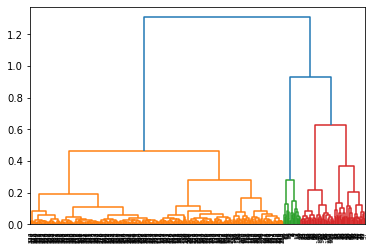

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

samples = df2.values


mergings = linkage(samples, method='complete')


dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

# Далее с помощью "метода" локтя мы можем перепроверить гипотезу об оптимальном количестве кластеров. Наша задача выбрать небольшое значение k, которое имеет низкие SSE. Оптимальное значение - 3 кластера, так как в этом отрезке мы видим уменьшение значения наряду с увеличением k. 

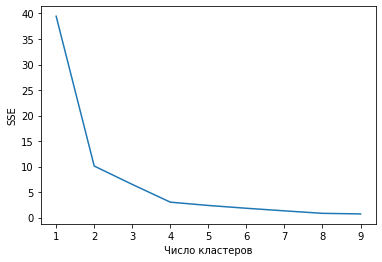

In [10]:

X = df2
data = X[['Номер магазина', 'Торговая площадь округл.', 'категория 1',
       'категория 2', 'категория 3', 'категория 4', 'категория 5',
       'категория 6', 'категория 7', 'категория 8', 'категория 9',
       'категория 10', 'категория 11', 'категория 12', 'категория 13',
       'категория 14', 'категория 15', 'категория 16', 'категория 17',
       'категория 18', 'категория 19', 'категория 20', 'категория 21',
       'категория 22', 'категория 23', 'категория 24', 'категория 25',
       'категория 26', 'категория 27', 'категория 28', 'категория 29',
       'категория 30', 'категория 31', 'Витрины ', 'ТЦ', 'Точка притяжения',
       'Парковка', 'Трафик', 'Населенный пункт', 'Месторасположение', 'Регион']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Число кластеров")
plt.ylabel("SSE")
plt.show()

# Cubic Clustering Criterion - хороший показатель для определения кластеров. Необходимо выбрать наибольшее значение, однако я бы предпочла второй вариант в связи с результатами предыдущего анализа. На такие значения может влиять тот факт, что третий кластер - очень маленький, особенно по сравнению с двумя другими.

In [11]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 6):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("Для n_clusters={}, коэффициент =  {}".format(n_cluster, sil_coeff))

Для n_clusters=2, коэффициент =  0.7259955176708115
Для n_clusters=3, коэффициент =  0.6299499514682262
Для n_clusters=4, коэффициент =  0.559970832951881
Для n_clusters=5, коэффициент =  0.5523987475273772


# Таким образом, мы определили наличие трёх кластеров. Можно предположить, что самый большой кластер - это самые крупные магазины с большим трафиком, находящиеся в людных местах, в больших городах. Самый маленький кластер - это магазины в области, без витрин, парковки и с небольшим трафиком.